# Using Statistics Canada rest api with Pandas 
See https://www.statcan.gc.ca/eng/developers/wds/user-guide for statcan api user guide.

In [20]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}, style = 'whitegrid')

### CPI
Call the post method to get the cpi then plot it.

In [2]:
url = 'https://www150.statcan.gc.ca/t1/wds/rest/getDataFromVectorsAndLatestNPeriods'
json = [{"vectorId": 41690973, "latestN":550}]
cpi_data = requests.post(url, json = json).json()
cpi = pd.json_normalize(cpi_data[0]['object'], 'vectorDataPoint')[['refPer', 'value']
                                                                ].rename(columns={"refPer": "date", "value": "CPI"}
                                                                        ).set_index('date')

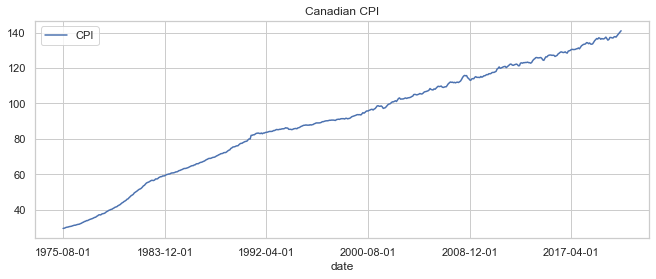

In [12]:
cpi.plot(title='Canadian CPI')
plt.show()

### Medain Income
Call the post method again to get median income.

Then combine with the CPI data and plot them on the same graph

In [4]:
url = 'https://www150.statcan.gc.ca/t1/wds/rest/getDataFromVectorsAndLatestNPeriods'
myobj = [{"vectorId": 107660858, "latestN":100}]
income_data = requests.post(url, json = myobj).json()
income = pd.json_normalize(income_data[0]['object'], 'vectorDataPoint')[['refPer', 'value']
                                                                ].rename(columns={"refPer": "date", "value": "Median Income"}
                                                                        ).set_index('date')

In [5]:
df = cpi.merge(income, left_on='date', right_on='date')
df.index = pd.to_datetime(df.index)

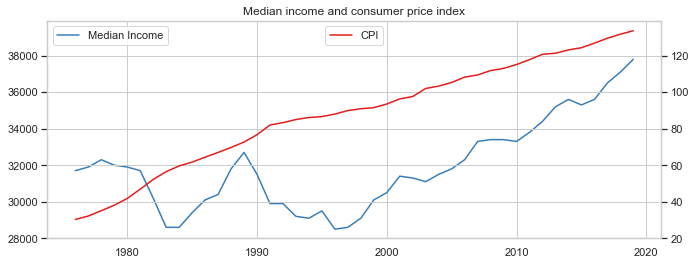

In [6]:
fig,ax1 = plt.subplots()

color = sns.color_palette("Set1")[1]
ax1.plot(df.index.year, df['Median Income'], color=color, label = 'Median Income')
ax1.legend(loc=2)
ax1.set_ylim([28000,39900]) 

ax2 = ax1.twinx()

color = sns.color_palette("Set1")[0]
ax2.plot(df.index.year, df['CPI'], color = color, label = 'CPI')
ax2.legend(loc=9)
ax2.set_ylim([20,139]) 


plt.title('Median income and consumer price index')

plt.show()

### Medain Income by Age groups
Call the bulk vecotor post method to get data for each age group

In [7]:
url = 'https://www150.statcan.gc.ca/t1/wds/rest/getBulkVectorDataByRange'
myobj = {
  "vectorIds": ["107661083","107661533", "107661758", "107661983", "107662208", "107662433"],
  "startDataPointReleaseDate": "1990-01-01T01:00",
  "endDataPointReleaseDate": "2021-07-01T01:00"
}
bulk_income_data = requests.post(url, json = myobj)

Combine each data set into one data frame then plot. The title of each vector is pulled using another post call.

In [18]:
bulk_income = pd.DataFrame({'date' :[]}).set_index('date')
for d in bulk_income_data.json():
    title = requests.post('https://www150.statcan.gc.ca/t1/wds/rest/getSeriesInfoFromVector'
                         , json = [{"vectorId":d['object']['vectorId']}]
                 ).json()[0]['object']['SeriesTitleEn'].split(';')[1]
    time.sleep(1)
    df = pd.json_normalize(d['object']
                       , 'vectorDataPoint')[['refPer', 'value']
                                           ].rename(columns={"refPer": "date", "value": title}).set_index('date')
    bulk_income = bulk_income.merge(df, how='outer', left_on='date', right_on='date')
   

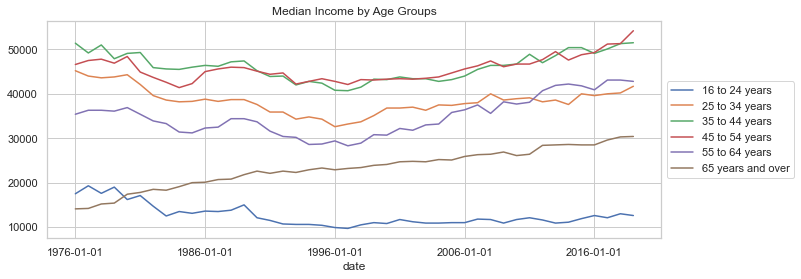

In [19]:
bulk_income.plot(title="Median Income by Age Groups").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()